In [2]:
import numpy as np

In [3]:
def hump_fn(max=.7, steps=100):
    lin = np.concatenate([np.linspace(0, max, steps // 2), np.linspace(max, 0, steps // 2)])
    lin = np.sqrt(lin)
    return lin

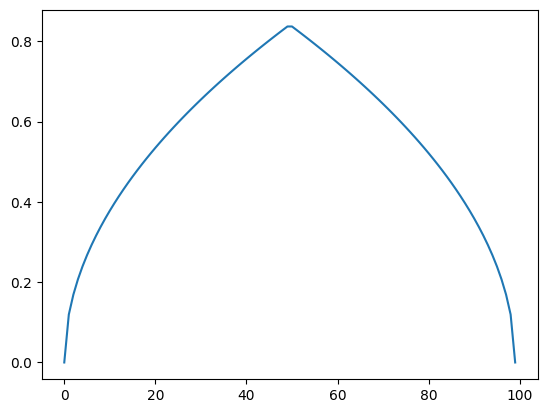

In [4]:
import matplotlib.pyplot as plt
plt.plot(hump_fn())

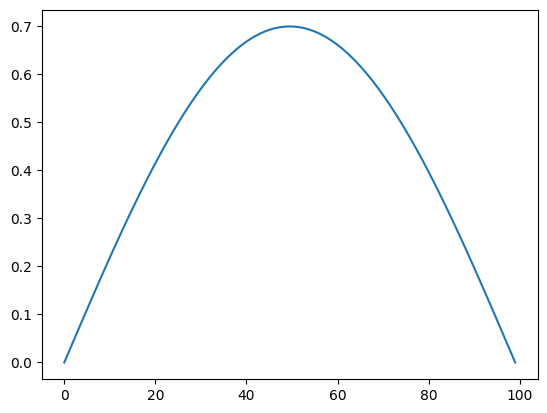

In [5]:
def cycle(max=0.7, steps=100):
    return np.sin(np.linspace(0, np.pi, steps)) * max
plt.plot(cycle())

In [6]:
import torch

timesteps = 1000
ts = torch.linspace(0, 1, timesteps + 1)

def theta_from_t(t, max=1.0):
    return torch.sin(t * torch.pi) * max * torch.pi / 2

def phi_from_t(t: torch.tensor, steepness=2):
    if not isinstance(t, torch.Tensor):
        t = torch.tensor(t)
    # divide by 0?
    ones_in_t = torch.isclose(t, torch.ones_like(t))
    out = torch.zeros_like(t)
    t = torch.where(ones_in_t, 0, t)
    # https://stats.stackexchange.com/questions/214877/is-there-a-formula-for-an-s-shaped-curve-with-domain-and-range-0-1
    out = 1 / (1 + (t/(1-t)) ** -2) * torch.pi / 2
    out = torch.where(ones_in_t, torch.pi/2, out)
    return out

In [7]:
phi_from_t(1)

tensor(1.5708)

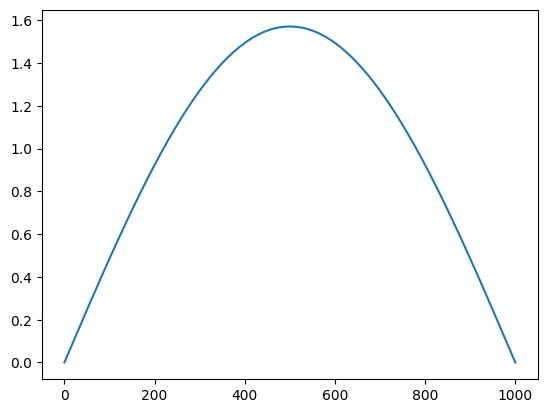

In [8]:
plt.plot(theta_from_t(ts).numpy())

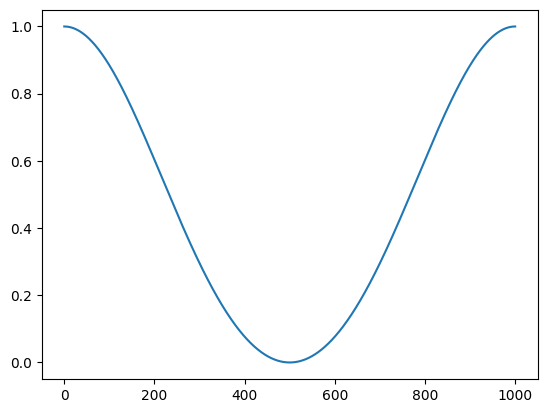

In [9]:
plt.plot(torch.cos(theta_from_t(ts)).numpy())

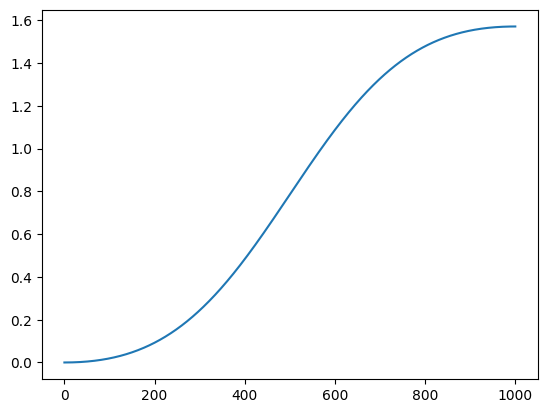

In [10]:
plt.plot(phi_from_t(ts).numpy())

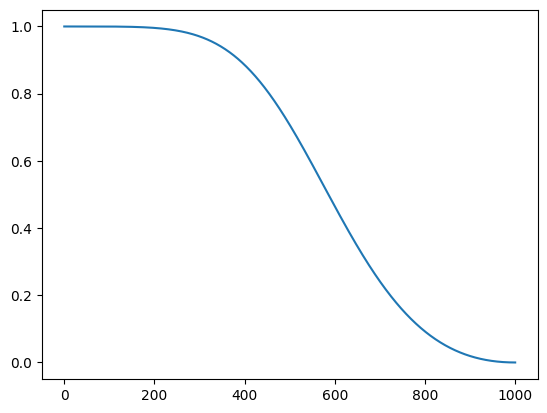

In [11]:
plt.plot(torch.cos(phi_from_t(ts)).numpy())

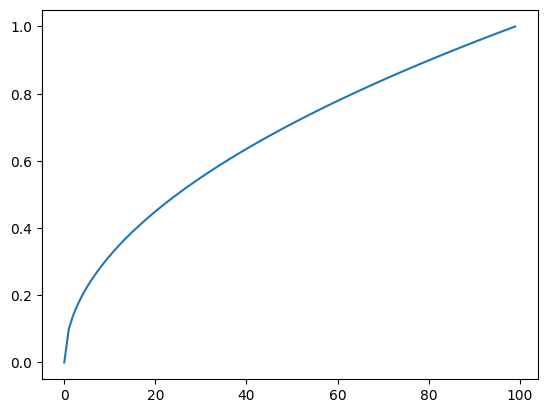

In [49]:
import math
t = torch.linspace(0, 1, 100)
root = torch.sqrt(t)
sin = torch.sin(torch.linspace(0, math.pi, 100))
plt.plot(root)

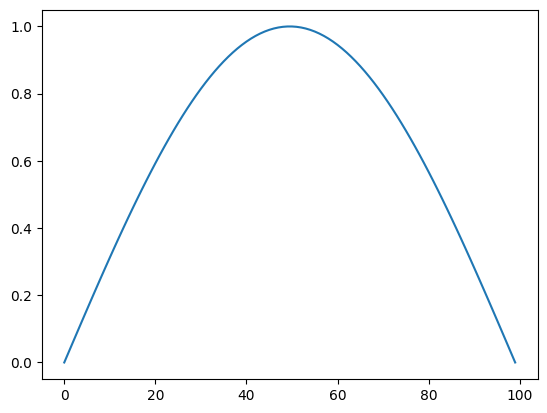

In [50]:
plt.plot(sin)

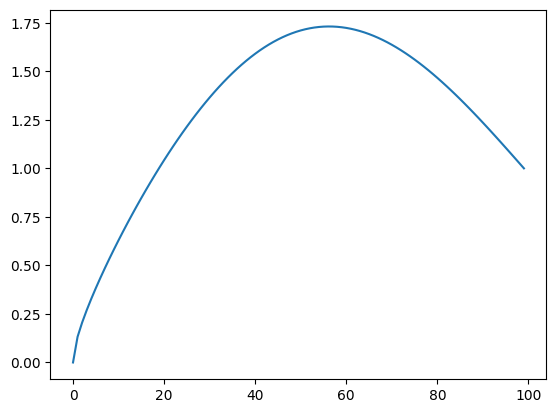

In [51]:
plt.plot(root + sin)

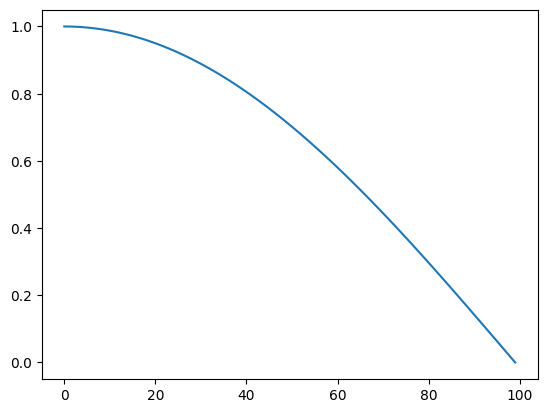

In [52]:
def gamma(t): return torch.cos(t * math.pi / 2) ** 2

t = torch.linspace(0, 1, 100)
plt.plot(torch.sqrt(gamma(t)))

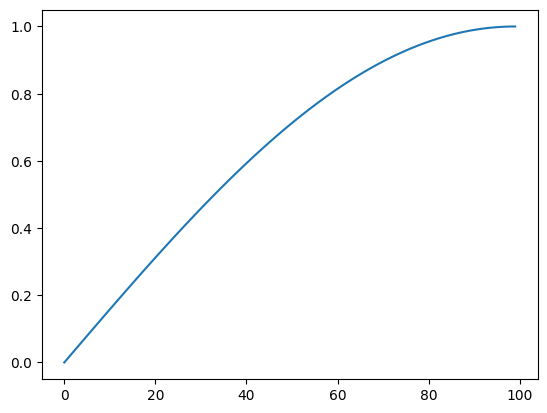

In [53]:
plt.plot(torch.sqrt(1 - gamma(t)))

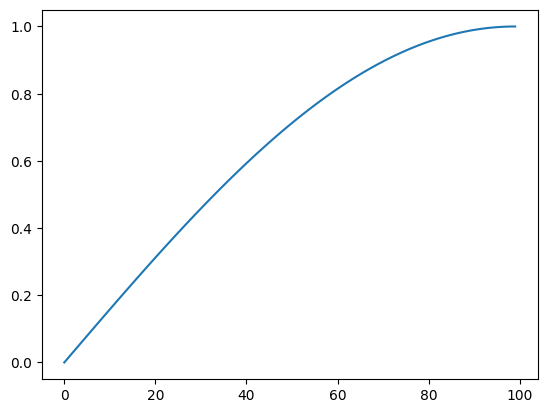

In [54]:
plt.plot(torch.sin(t * math.pi / 2))

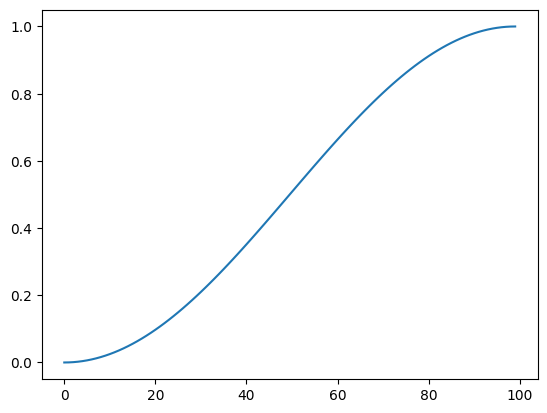

In [56]:
plt.plot(torch.sin(t * math.pi / 2) ** 2)